# 1. Import relevant libraries and modules

In [2]:
# Import relevant libraries and modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import brightway2 as bw
import math
import sys
from brightway2 import *
from bw2data.parameters import ActivityParameter, DatabaseParameter, ProjectParameter, Group

In [3]:
import scienceplots as sp

# 2.1 If new project is set up, check the followings

In [4]:
# Check all the projects in the bw
bw.projects

# Set current project to "Rooftop_Garden_Tomato"
projects.set_current("Rooftop_Garden_Tomato")

# Get the current project
current_project = projects.current

# Print the current project
print("Current Project:", current_project)

# Check databases available in the project
bw.databases

# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')

Current Project: Rooftop_Garden_Tomato


# 2.2 If new project is not set up, follow the below steps

In [3]:
# See where the projects stored
bw.projects.dir # 'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\default.c21f969b5f03d33d43e04f8f136e7682'

'C:\\Users\\DELL\\AppData\\Local\\pylca\\Brightway3\\default.c21f969b5f03d33d43e04f8f136e7682'

In [3]:
### Setup a project ###
# Create a new project called "Rooftop_Garden_Tomato"
bw.projects.set_current("Rooftop_Garden_Tomato")
bw.bw2setup() #Importing elementary flows, LCIA methods and some other data

Biosphere database already present!!! No setup is needed


In [8]:
### Database import/setup ###
#list the available databases
bw.databases
# Import ecoinvent 3.6
if 'ecoinvent 3.6_cut-off_ecoSpold02' in bw.databases:
    print("Database has already been imported.")
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    file_path_ei36cut = r"C:\Users\DELL\OneDrive\Desktop\IC Project\LCA\Ecoinvent\3.6\ecoinvent 3.6_cut-off_ecoSpold02\datasets"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei36cut = bw.SingleOutputEcospold2Importer(file_path_ei36cut, 'ecoinvent 3.6_cut-off_ecoSpold02')
    ei36cut
    ei36cut.apply_strategies()
    ei36cut.statistics()

Extracting XML data from 18121 datasets
Extracted 18121 datasets in 423.82 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy:

In [10]:
# Iterate over all datasets in your data
for dataset in ei36cut:
    # Keep only valid exchanges
    dataset['exchanges'] = [exc for exc in dataset['exchanges'] if 'input' in exc and 'amount' in exc]

In [11]:
#write database to disk --> actually saves it
ei36cut.write_database()

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:03:44


Title: Writing activities to SQLite3 database:
  Started: 06/23/2023 20:45:27
  Finished: 06/23/2023 20:49:12
  Total time elapsed: 00:03:44
  CPU %: 87.30
  Memory %: 34.01
Created database: ecoinvent 3.6_cut-off_ecoSpold02


Brightway2 SQLiteBackend: ecoinvent 3.6_cut-off_ecoSpold02

In [2]:
#list the available databases
bw.databases

Databases dictionary with 1 object(s):
	forwast

In [ ]:
# check which project you are working with
print(bw.projects.current)

# 3 Start input
## Activity 1: Cultivation system (Raised bed construction)

In [259]:
results = eidb.search('mixed_waste')

for activity in results:
    print(activity['name'])
    print(activity['code'])

In [261]:
activity = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02').get('033358f5f277a630e25b22f9686f2e91')
print(activity)
activity.as_dict()

'nutrient supply from vinasse, from fermentation of sugarcane' (kilogram, GLO, None)


In [17]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')

In [15]:
for act in [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']]:
    print(act)
    print(act['code'])

'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
fc2a9e3501d62d5a0ed4c1a7aa4ec170


In [12]:
# check activity details
a = eidb.get('ea3caae65d0a28b616f0a2442504098c')
a.as_dict()
#for exchange in a.exchanges():
#    print(exchange)

In [8]:
# construction of the raised bed
# create a new activity
raised_bed = eidb.new_activity(code = 'raised_bed', name = "raised_bed", unit = "unit")
raised_bed.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
wood = [act for act in eidb if 'sawnwood production, softwood, dried (u=10%)' in act['name'] and 'RER' in act['location']][0] 
# 'sawnwood production, softwood, dried (u=10%), planed' (cubic meter, RER, None)
raised_bed.new_exchange(input=wood.key, amount=0.001184, type='technosphere').save()
raised_bed.save()

screws = [act for act in eidb if 'steel production, electric, chromium steel 18/8' in act['name'] and 'RER' in act['location']][0] 
# steel production, electric, chromium steel 18/8' (kilogram, RER, None)
raised_bed.new_exchange(input=screws.key, amount=0.012, type='technosphere').save()
raised_bed.save()

geotextile = [act for act in eidb if 'textile production, non woven polypropylene' in act['name'] and 'RoW' in act['location']][0] 
# 'textile production, non woven polypropylene, spun bond' (kilogram, RoW, None)
raised_bed.new_exchange(input=geotextile.key, amount=0.015, type='technosphere').save()
raised_bed.save()

clay_balls = [act for act in eidb if 'expanded clay production' in act['name'] and 'RoW' in act['location']][0] 
# 'expanded clay production' (kilogram, RoW, None)
raised_bed.new_exchange(input=clay_balls.key, amount=1.14, type='technosphere').save()
raised_bed.save()

EPDM = [act for act in eidb if 'synthetic rubber production' in act['name'] and 'RER' in act['location']][0] 
# 'synthetic rubber production' (kilogram, RER, None)
raised_bed.new_exchange(input=EPDM.key, amount=0.337, type='technosphere').save()
raised_bed.save()

construction = [act for act in eidb if 'electricity, low voltage' in act['name'] and 'GB' in act['location']][0] 
# 'market for electricity, low voltage' (kilowatt hour, GB, None)
raised_bed.new_exchange(input=construction.key, amount=0.000667, type='technosphere').save()
raised_bed.save()

transport = [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']][0] 
# 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
raised_bed.new_exchange(input=transport.key, amount=0.011289, type='technosphere').save()
raised_bed.save()


In [7]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='raised_bed']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [31]:
# get general information on the new activity
eidb.search('raised_bed')

['raised_bed' (unit, GLO, None)]

In [9]:
# Have a look at all exchanges of the selected activity
for exc in raised_bed.exchanges():
    print(exc)

Exchange: 0.001184 cubic meter 'sawnwood production, softwood, dried (u=10%), planed' (cubic meter, RER, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 0.012 kilogram 'steel production, electric, chromium steel 18/8' (kilogram, RER, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 0.015 kilogram 'textile production, non woven polypropylene, spun bond' (kilogram, RoW, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 1.14 kilogram 'expanded clay production' (kilogram, RoW, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 0.337 kilogram 'synthetic rubber production' (kilogram, RER, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 0.000667 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, GB, None) to 'raised_bed' (unit, GLO, None)>
Exchange: 0.011289 ton kilometer 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None) to 'raised_bed' (unit, GLO, None)>


### Activity 1 LCA and Monte Carlo

In [15]:
functional_unit1 = {raised_bed:1}

In [16]:
IPCC_method1 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [17]:
lca1 = bw.LCA(functional_unit1,IPCC_method1)

In [18]:
lca1.lci()
lca1.lcia()

In [19]:
mean_score1 = lca1.score

In [20]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit1.keys())[0]['name'],
    lca1.score,
    bw.methods.get(IPCC_method1).get('unit')
    ))

The raised_bed process accounts for 1.500482 kg CO2-Eq.


In [22]:
np.random.seed(0)
mc1 = bw.MonteCarloLCA({raised_bed:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores1 = [next(mc1) for iteration in range(1000)]

In [218]:
lower = np.percentile(scores1, 2.5)
b = np.percentile(scores1, 97.5)
print(lower)

1.3832350388318093


(array([ 1.,  0.,  0.,  1.,  1.,  5.,  3.,  2.,  6.,  6.,  7., 15., 19.,
        20., 15., 25., 26., 24., 25., 34., 39., 46., 35., 37., 49., 45.,
        42., 32., 36., 34., 40., 26., 36., 42., 26., 19., 17., 17., 14.,
        17., 11., 11.,  8.,  9., 13.,  9.,  8.,  5.,  6.,  6.,  2.,  2.,
         6.,  2.,  1.,  1.,  2.,  1.,  4.,  1.,  1.,  0.,  0.,  2.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.16771602, 1.18916459, 1.21061316, 1.23206172, 1.25351029,
        1.27495886, 1.29640743, 1.317856  , 1.33930457, 1.36075313,
        1.3822017 , 1.40365027, 1.42509884, 1.44654741, 1.46799598,
        1.48944454, 1.51089311, 1.53234168, 1.55379025, 1.57523882,
        1.59668739, 1.61813595, 1.63958452, 1.66103309, 1.68248166,
        1.70393023, 1.72537879, 1.74682736, 1.76827593, 1.7897245 ,
        1.81117307, 1.8326

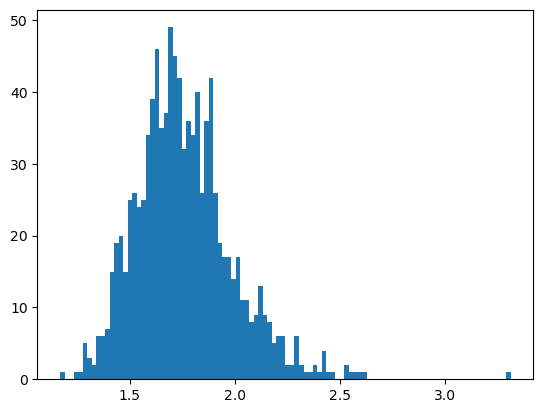

In [211]:
plt.hist(scores1, bins=100)

### Activity 1 Data Record

In [98]:
import pandas as pd

In [99]:
# Put the Monte Carlo result in a dataframe
df = pd.DataFrame({'raised_bed_MC': scores1})

In [100]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df.to_excel(writer, index=False, sheet_name='Sheet1')

## Activity 2: Ausxiliary equipment

In [3]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')

In [89]:
for act in [act for act in eidb if 'molasses, from sugar beet, to generic market for energy feed' in act['name'] and 'kilogram' in act['unit'] and 'GLO' in act['location']]:
    print(act)
    print(act['code'])

'molasses, from sugar beet, to generic market for energy feed' (kilogram, GLO, None)
999f67acb4d3d1056460eb33b1a55daa


In [16]:
for act in [act for act in eidb if 'lorry 3.5-7.5 metric ton' in act['name'] and 'RoW' in act['location']]:
    print(act)
    print(act['code'])

'market for transport, freight, lorry 3.5-7.5 metric ton, EURO4' (ton kilometer, RoW, None)
7f9d35965ec0576eb5e7e06200e5ad71
'market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None)
15e01858e2694ef0f562ed10ab382dd4
'transport, freight, lorry 3.5-7.5 metric ton, EURO3' (ton kilometer, RoW, None)
8de043af16f4c967c2a3fe2bddc849b6
'transport, freight, lorry 3.5-7.5 metric ton, EURO5' (ton kilometer, RoW, None)
b991399fc4d14ca8bd53b9474622d5c9
'market for transport, freight, lorry 3.5-7.5 metric ton, EURO3' (ton kilometer, RoW, None)
54a0d2bc8693feacb024193c912e1153
'market for transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
76b417d1d52af0fcb7820d8b2fa7f800
'transport, freight, lorry 3.5-7.5 metric ton, EURO4' (ton kilometer, RoW, None)
54f4cdbb2a63a58b567a6e148e76b000
'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
fc2a9e3501d62d5a0ed4c1a7aa4ec170


In [262]:
process = [act for act in eidb if 'polyethylene production, low density, granulate' in act['name'] and 'production' in act['name'] and 'RER' in act['location']][1]
process.as_dict()

In [21]:
# Check select activity details
a = eidb.get('fbc4181dbdf65ac7a47a28cd3e6f86ac')
a.as_dict()
#for exchange in a.exchanges():
#    print(exchange)

{'comment': 'High-pressure polymerisation is carried out at pressures of 1500 to 3500 bar and temperatures of about 200°C. Under those conditions, oxygen or peroxides work as initiators to start the radical polymerisation process. The reaction may take place either in an autoclave or a tubular reactor. The polymerisation is an exothermic reaction. The ethylene gas is used as a heat sink for the resulting heat, which means that the ethylene gas cannot be to-tally converted to polymer. The unreacted gas is directly recycled back into the process and combined with fresh ethylene. Furthermore, the heat of the exothermic reaction can be recuperated to generate low pressure steam.\nThe initiator concentrations usually vary between 0.1 and 0.5 wt.-%. Decomposed metal alkyl residues of the initiator remain in the product and sometimes have an influence on end-use properties. Dissociation products of the radical initiator are removed from the polymer or built in.\n\nAfter the reaction phase, mo

In [11]:
# auxiliary equipment
# create a new activity
auxiliary_equipment = eidb.new_activity(code = 'auxiliary_equipment', name = "auxiliary_equipment", unit = "unit")
auxiliary_equipment.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
support_system_steel = [act for act in eidb if 'steel production, electric, chromium steel 18/8' in act['name'] and 'RER' in act['location']][0] 
# steel production, electric, chromium steel 18/8' (kilogram, RER, None)
auxiliary_equipment.new_exchange(input=support_system_steel.key, amount=0.036364, type='technosphere').save()
auxiliary_equipment.save()

support_system_pvc = [act for act in eidb if 'polyvinylchloride production, bulk polymerisation' in act['name'] and 'RER' in act['location']][0] 
# polyvinylchloride production, bulk polymerisation' (kilogram, RER, None)
auxiliary_equipment.new_exchange(input=support_system_pvc.key, amount=0.036364, type='technosphere').save()
auxiliary_equipment.save()

netting = [act for act in eidb if 'polyethylene' in act['name'] and 'fleece' in act['name'] and 'RER' in act['location']][0] 
# fleece production, polyethylene' (kilogram, RER, None)
auxiliary_equipment.new_exchange(input=netting.key, amount=0.078, type='technosphere').save()
auxiliary_equipment.save()

irrigation_pipe = [act for act in eidb if 'polypropylene' in act['name'] and 'production' in act['name'] and 'RER' in act['location']][0] 
# polypropylene production, granulate' (kilogram, RER, None)
auxiliary_equipment.new_exchange(input=irrigation_pipe.key, amount=0.0018, type='technosphere').save()
auxiliary_equipment.save()

drip_head = eidb.get('fbc4181dbdf65ac7a47a28cd3e6f86ac')
# 'polyethylene production, low density, granulate' (kilogram, RER, None) -- 2 identical, select by unique code
auxiliary_equipment.new_exchange(input=drip_head.key, amount=0.0007, type='technosphere').save()
auxiliary_equipment.save()

transport = [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']][0]
# 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
auxiliary_equipment.new_exchange(input=transport.key, amount=0.000672, type='technosphere').save()
auxiliary_equipment.save()


In [10]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='auxiliary_equipment']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [47]:
# get general information on the new activity
eidb.search('auxiliary_equipment')

['auxiliary_equipment' (unit, GLO, None)]

In [23]:
# Have a look at all exchanges of the selected activity
for exc in auxiliary_equipment.exchanges():
    print(exc)

Exchange: 0.036364 kilogram 'steel production, electric, chromium steel 18/8' (kilogram, RER, None) to 'auxiliary_equipment' (unit, GLO, None)>
Exchange: 0.036364 kilogram 'polyvinylchloride production, bulk polymerisation' (kilogram, RER, None) to 'auxiliary_equipment' (unit, GLO, None)>
Exchange: 0.078 kilogram 'fleece production, polyethylene' (kilogram, RER, None) to 'auxiliary_equipment' (unit, GLO, None)>
Exchange: 0.0018 kilogram 'polypropylene production, granulate' (kilogram, RER, None) to 'auxiliary_equipment' (unit, GLO, None)>
Exchange: 0.0007 kilogram 'polyethylene production, low density, granulate' (kilogram, RER, None) to 'auxiliary_equipment' (unit, GLO, None)>
Exchange: 0.000672 ton kilometer 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None) to 'auxiliary_equipment' (unit, GLO, None)>


### Activity 2 LCA and Monte Carlo

In [39]:
functional_unit2 = {auxiliary_equipment:1}

In [40]:
IPCC_method2 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [41]:
lca2 = bw.LCA(functional_unit2,IPCC_method2)

In [42]:
lca2.lci()
lca2.lcia()

In [43]:
mean_score2 = lca2.score

In [44]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit2.keys())[0]['name'],
    lca2.score,
    bw.methods.get(IPCC_method2).get('unit')
    ))

The auxiliary_equipment process accounts for 0.474859 kg CO2-Eq.


In [45]:
np.random.seed(12)
mc2 = bw.MonteCarloLCA({auxiliary_equipment:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores2 = [next(mc2) for iteration in range(1000)]

(array([ 2.,  0.,  0.,  3.,  0.,  1.,  3.,  0.,  5.,  2.,  5.,  5.,  6.,
        14.,  9., 15., 15., 20., 11., 18., 21., 31., 19., 22., 25., 20.,
        23., 21., 27., 33., 28., 39., 31., 28., 28., 29., 33., 35., 19.,
        28., 24., 19., 19., 24., 17., 21., 16., 19., 15., 10., 15., 13.,
        12.,  5.,  8.,  2., 12.,  7.,  7., 11.,  5.,  7.,  6.,  5.,  2.,
         1.,  2.,  2.,  1.,  1.,  3.,  1.,  1.,  3.,  3.,  0.,  0.,  1.,
         3.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.34585098, 0.35120768, 0.35656439, 0.36192109, 0.3672778 ,
        0.3726345 , 0.37799121, 0.38334791, 0.38870462, 0.39406132,
        0.39941803, 0.40477473, 0.41013144, 0.41548814, 0.42084485,
        0.42620155, 0.43155826, 0.43691496, 0.44227167, 0.44762837,
        0.45298508, 0.45834178, 0.46369849, 0.46905519, 0.4744119 ,
        0.4797686 , 0.48512531, 0.49048201, 0.49583872, 0.50119542,
        0.50655213, 0.5119

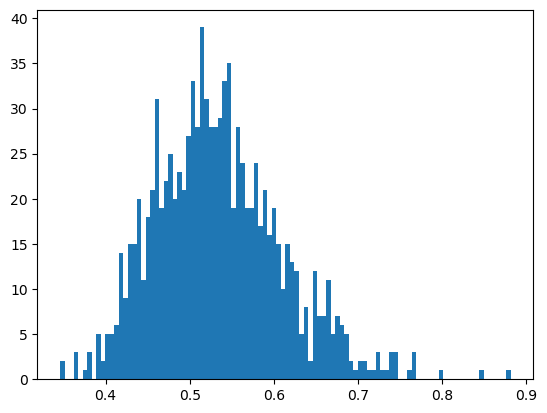

In [63]:
plt.hist(scores2, bins=100)

### Activity 2 Data Record

In [101]:
import pandas as pd

In [102]:
# Access the existing data frame
df_existing2 = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new2 = pd.DataFrame({'auxiliary_equipment_MC': scores2})
# Append new data as a new column to the existing DataFrame
df_updated2 = pd.concat([df_existing2, df_new2], axis=1)

In [103]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated2.to_excel(writer, index=False, sheet_name='Sheet1')

## Activity 3: Growing Medium

In [ ]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')

In [20]:
for act in [act for act in eidb if 'treatment of biowaste, industrial composting' in act['name'] and 'RoW' in act['location']]:
    print(act)
    print(act['code'])

'treatment of biowaste, industrial composting' (kilogram, RoW, None)
a699b572e6fc8b34f9f4f19e388ada69
'treatment of biowaste, industrial composting' (kilogram, RoW, None)
e6db7a4717ee1889bf40851a49c702b3


In [25]:
# Check select activity details
a = eidb.get('e6db7a4717ee1889bf40851a49c702b3')
a.as_dict()

{'comment': 'The proposed method to account for humus C is based on the following methodology:\nDifferent substrates have different capacities of organic matter to form humus (see following table)\n[This dataset is meant to replace the following datasets:\n - treatment of biowaste, composting, GLO, 1999 - 1999 (220f3802-d00e-4447-95e5-c0f5b164db4a)]\nMore detailed descriptions and background information can be found in the corresponding report.\nThe organic carbon content of soil (Corg) is normally used to declare the amount of organic matter of soil. The content of humus is calculated from Corg, using the assumption that humus contains 58% carbon on average.\nThe amount of humus is therefore calculated out of Corg as follows: \nhumus content [%] or [mg g-1] = (Ctotal – Cinorg) / 0.58\nThe composting treatment is a process of controlled decomposition and humification of biodegradable materials under managed conditions, which is aerobic and which allows the development of temperatures s

In [56]:
a = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
for exchange in a.exchanges():
    print(exchange.uncertainty)

{'uncertainty type': 0, 'loc': -1.0}
{'uncertainty type': 2, 'loc': -18.720435397638415, 'scale': 0.5596427431853289}
{'uncertainty type': 2, 'loc': -7.951559331155252, 'scale': 0.12884098726725127}
{'uncertainty type': 2, 'loc': -8.97849124719841, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -10.719249778597819, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -7.597763498055371, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -6.320934874295903, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -7.919288375762678, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -5.203077452407179, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -7.005905338005954, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -5.959124764343722, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -17.539558499769015, 'scale': 0.11489125293076058}
{'uncertainty type': 2, 'loc': -18.91798405236243, 'scale': 0.114891252

In [14]:
# growing medium
# create a new activity
growing_medium = eidb.new_activity(code = 'growing_medium', name = "growing_medium", unit = "unit")
growing_medium.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
wood_chips = [act for act in eidb if 'wood chips production, hardwood' in act['name'] and 'RoW' in act['location']][0] 
# wood chips production, hardwood, at sawmill' (kilogram, RoW, None)
growing_medium.new_exchange(input=wood_chips.key, amount=1.4, type='technosphere').save()
growing_medium.save()

substrate = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
# treatment of biowaste, industrial composting' (kilogram, RoW, None) -- 2 identical, select by unique code
growing_medium.new_exchange(input=substrate.key, amount=14.44, type='technosphere').save()
growing_medium.save()

substrate_avoided = eidb.get('e6db7a4717ee1889bf40851a49c702b3')
# treatment of biowaste, industrial composting' (kilogram, RoW, None) -- 2 identical, select by unique code, reference product is compost
growing_medium.new_exchange(input=substrate_avoided.key, amount=-0.46, type='technosphere').save()
growing_medium.save()

transport = [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']][0]
# 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
growing_medium.new_exchange(input=transport.key, amount=0.1188, type='technosphere').save()
growing_medium.save()
    

In [13]:
# Check details of "treatment of biowaste, industrial composting' (kilogram, RoW, None)"
substrate = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
inputs = substrate.technosphere()
for exchange in inputs:
    print(exchange)

Exchange: 7.41e-09 unit 'market for composting facility, open' (unit, GLO, None) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.000352112676056338 hour 'market for machine operation, diesel, >= 74.57 kW, low load factor' (hour, GLO, None) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.000126092947146191 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, AU, None) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 2.21151032340819e-05 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, NZ, None) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.000501571946592553 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, RU, None) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.00179826157163375 kilowatt hour 'market group for electricity, low voltage' (kilowatt hour, 

In [14]:
outputs = substrate.biosphere()
for exchange in outputs:
    print(exchange)

Exchange: 0.001 kilogram 'Methane, non-fossil' (kilogram, None, ('air', 'urban air close to ground')) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.000125 cubic meter 'Water' (cubic meter, None, ('air',)) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.0007 kilogram 'Ammonia' (kilogram, None, ('air', 'urban air close to ground')) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 2.5e-05 kilogram 'Dinitrogen monoxide' (kilogram, None, ('air', 'urban air close to ground')) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.22 kilogram 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')) to 'treatment of biowaste, industrial composting' (kilogram, RoW, None)>
Exchange: 0.000526 kilogram 'Hydrogen sulfide' (kilogram, None, ('air', 'urban air close to ground')) to 'treatment of biowaste, industrial composting' (kilogram

In [13]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='growing_medium']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [4]:
# get general information on the new activity
eidb.search('growing_medium')

['growing_medium' (unit, GLO, None)]

In [46]:
# Have a look at all exchanges of the selected activity
for exc in growing_medium.exchanges():
    print(exc)

Exchange: 1.4 kilogram 'wood chips production, hardwood, at sawmill' (kilogram, RoW, None) to 'growing_medium' (unit, GLO, None)>
Exchange: 14.44 kilogram 'treatment of biowaste, industrial composting' (kilogram, RoW, None) to 'growing_medium' (unit, GLO, None)>
Exchange: -0.46 kilogram 'treatment of biowaste, industrial composting' (kilogram, RoW, None) to 'growing_medium' (unit, GLO, None)>
Exchange: 0.1188 ton kilometer 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None) to 'growing_medium' (unit, GLO, None)>


### Activity 3 LCA and Monte Carlo

In [47]:
functional_unit3 = {growing_medium:1}

In [48]:
IPCC_method3 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [49]:
lca3 = bw.LCA(functional_unit3,IPCC_method3)

In [50]:
lca3.lci()
lca3.lcia()

In [51]:
mean_score3 = lca3.score

In [52]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit3.keys())[0]['name'],
    lca3.score,
    bw.methods.get(IPCC_method3).get('unit')
    ))

The growing_medium process accounts for -0.740750 kg CO2-Eq.


In [53]:
np.random.seed(123)
mc3 = bw.MonteCarloLCA({growing_medium:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores3 = [next(mc3) for iteration in range(1000)]

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  1.,  1.,  0.,  2.,  1.,  1.,  2.,  0.,  5.,  2.,  3.,  1.,
         5.,  4.,  5.,  8.,  6.,  9.,  5.,  9.,  4., 13., 11., 14., 15.,
        21., 19., 17., 24., 17., 37., 26., 37., 40., 38., 28., 43., 41.,
        39., 43., 38., 24., 44., 41., 39., 24., 30., 32., 23., 28., 12.,
        13.,  9., 12.,  7.,  4.,  4.,  4.,  2.,  5.]),
 array([-1.56879528, -1.55860995, -1.54842462, -1.53823928, -1.52805395,
        -1.51786862, -1.50768328, -1.49749795, -1.48731262, -1.47712729,
        -1.46694195, -1.45675662, -1.44657129, -1.43638595, -1.42620062,
        -1.41601529, -1.40582995, -1.39564462, -1.38545929, -1.37527395,
        -1.36508862, -1.35490329, -1.34471796, -1.33453262, -1.32434729,
        -1.31416196, -1.30397662, -1.29379129, -1.28360596, -1.273420

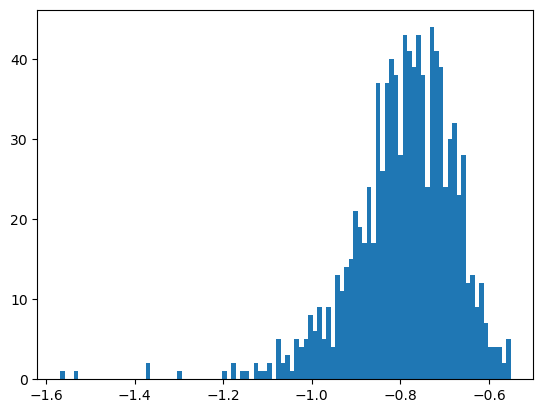

In [89]:
plt.hist(scores3, bins=100)

### Activity 3 Data Record

In [104]:
import pandas as pd

In [105]:
# Access the existing data frame
df_existing3 = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new3 = pd.DataFrame({'growing_medium_MC': scores3})
# Append new data as a new column to the existing DataFrame
df_updated3 = pd.concat([df_existing3, df_new3], axis=1)

In [106]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated3.to_excel(writer, index=False, sheet_name='Sheet1')

## Activity 4: Crop Growth

In [ ]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')  

In [28]:
for act in [act for act in eidb if 'tap water production, conventional treatment' in act['name'] and 'Europe without Switzerland' in act['location']]:
    print(act)
    print(act['code'])

'tap water production, conventional treatment' (kilogram, Europe without Switzerland, None)
d6a50b679dcd88daea80e9f6f6d5ef43


In [ ]:
# Check select activity details
a = eidb.get('e6db7a4717ee1889bf40851a49c702b3')
a.as_dict()

In [ ]:
a = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
for exchange in a.exchanges():
    print(exchange)

In [56]:
# Define the crop growth
# create a new activity
crop_growth = eidb.new_activity(code = 'crop_growth', name = "crop_growth", unit = "unit")
crop_growth.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
fertiliser_chicken_manure = [act for act in eidb if 'poultry manure, dried, Recycled Content cut-off' in act['name']][0] 
# poultry manure, dried, Recycled Content cut-off (kilogram, GLO, None)
crop_growth.new_exchange(input=fertiliser_chicken_manure.key, amount=0.018182, type='technosphere').save()
crop_growth.save()

fertiliser_molasses = [act for act in eidb if 'molasses, from sugar beet, to generic market for energy feed' in act['name'] and 'kilogram' in act['unit'] and 'GLO' in act['location']][0] 
# molasses, from sugar beet, to generic market for energy feed' (kilogram, GLO, None)
crop_growth.new_exchange(input=fertiliser_molasses.key, amount=0.338182, type='technosphere').save()
crop_growth.save()

irrigation = [act for act in eidb if 'tap water production, conventional treatment' in act['name'] and 'Europe without Switzerland' in act['location']][0] 
# tap water production, conventional treatment' (kilogram, Europe without Switzerland, None)
crop_growth.new_exchange(input=irrigation.key, amount=118.8, type='technosphere').save()
crop_growth.save()

transport = [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']][0] 
# 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
crop_growth.new_exchange(input=transport.key, amount=0.002673, type='technosphere').save()
crop_growth.save()


In [55]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='crop_growth']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [ ]:
# get general information on the new activity
eidb.search('crop_growth')

In [57]:
# Have a look at all exchanges of the selected activity
for exc in crop_growth.exchanges():
    print(exc)

Exchange: 0.018182 kilogram 'poultry manure, dried, Recycled Content cut-off' (kilogram, GLO, None) to 'crop_growth' (unit, GLO, None)>
Exchange: 0.338182 kilogram 'molasses, from sugar beet, to generic market for energy feed' (kilogram, GLO, None) to 'crop_growth' (unit, GLO, None)>
Exchange: 118.8 kilogram 'tap water production, conventional treatment' (kilogram, Europe without Switzerland, None) to 'crop_growth' (unit, GLO, None)>
Exchange: 0.002673 ton kilometer 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None) to 'crop_growth' (unit, GLO, None)>


### Activity 4 LCA and Monte Carlo

In [58]:
functional_unit4 = {crop_growth:1}

In [59]:
IPCC_method4 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [60]:
lca4 = bw.LCA(functional_unit4,IPCC_method4)

In [61]:
lca4.lci()
lca4.lcia()

In [62]:
mean_score4 =lca4.score

In [63]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit4.keys())[0]['name'],
    lca4.score,
    bw.methods.get(IPCC_method4).get('unit')
    ))

The crop_growth process accounts for 0.076065 kg CO2-Eq.


In [64]:
np.random.seed(1234)
mc4 = bw.MonteCarloLCA({crop_growth:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores4 = [next(mc4) for iteration in range(1000)]

(array([ 1.,  2.,  1.,  2.,  1.,  2.,  6.,  4.,  7.,  9.,  5., 15.,  8.,
        11., 16., 18., 22., 20., 29., 31., 29., 38., 29., 24., 28., 37.,
        35., 29., 29., 29., 36., 27., 28., 31., 27., 33., 23., 21., 18.,
        17., 21., 13., 15., 17.,  8., 13.,  8., 20., 14.,  6., 10., 12.,
        11.,  6., 10.,  4.,  2.,  2.,  3.,  1.,  2.,  1.,  5.,  2.,  6.,
         1.,  0.,  2.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.06582866, 0.06646301, 0.06709735, 0.0677317 , 0.06836604,
        0.06900038, 0.06963473, 0.07026907, 0.07090342, 0.07153776,
        0.0721721 , 0.07280645, 0.07344079, 0.07407514, 0.07470948,
        0.07534383, 0.07597817, 0.07661251, 0.07724686, 0.0778812 ,
        0.07851555, 0.07914989, 0.07978423, 0.08041858, 0.08105292,
        0.08168727, 0.08232161, 0.08295595, 0.0835903 , 0.08422464,
        0.08485899, 0.0854

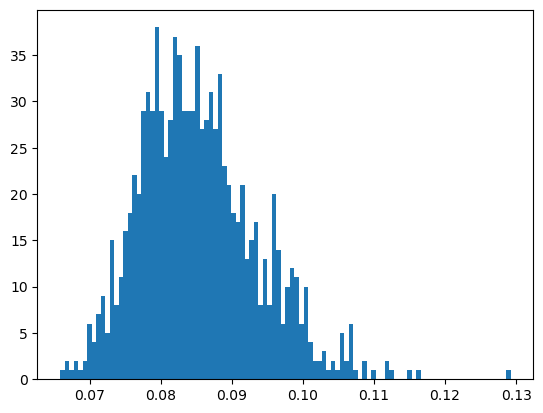

In [102]:
plt.hist(scores4, bins=100)

### Activity 4 Data Record

In [107]:
import pandas as pd

In [108]:
# Access the existing data frame
df_existing4 = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new4 = pd.DataFrame({'crop_growth_MC': scores4})
# Append new data as a new column to the existing DataFrame
df_updated4 = pd.concat([df_existing4, df_new4], axis=1)

In [109]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated4.to_excel(writer, index=False, sheet_name='Sheet1')

## Activity 5: Storage

In [ ]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')  

In [29]:
for act in [act for act in eidb if 'electricity, low voltage' in act['name'] and 'GB' in act['location']]:
    print(act)
    print(act['code'])

'market for electricity, low voltage' (kilowatt hour, GB, None)
d587f48143178aa2f423d4baa1ff1831


In [ ]:
# Check select activity details
a = eidb.get('e6db7a4717ee1889bf40851a49c702b3')
a.as_dict()

In [ ]:
# Check all exchanges of each activity
a = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
for exchange in a.exchanges():
    print(exchange)

In [66]:
# Define the crop growth
# create a new activity
storage_tomato = eidb.new_activity(code = 'storage_tomato', name = "storage_tomato", unit = "unit")
storage_tomato.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
refrigerator = [act for act in eidb if 'electricity, low voltage' in act['name'] and 'GB' in act['location']][0] 
# 'market for electricity, low voltage' (kilowatt hour, GB, None)
storage_tomato.new_exchange(input=refrigerator.key, amount=0.2025, type='technosphere').save()
storage_tomato.save()


In [65]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='storage_tomato']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [ ]:
# get general information on the new activity
eidb.search('storage_tomato')

In [76]:
# Have a look at all exchanges of the selected activity
for exc in storage_tomato.exchanges():
    print(exc)

Exchange: 0.2025 kilowatt hour 'market for electricity, low voltage' (kilowatt hour, GB, None) to 'storage_tomato' (unit, GLO, None)>


### Activity 5 LCA and Monte Carlo

In [68]:
functional_unit5 = {storage_tomato:1}

In [69]:
IPCC_method5 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [70]:
lca5 = bw.LCA(functional_unit5,IPCC_method5)

In [71]:
lca5.lci()
lca5.lcia()

In [72]:
mean_score5 = lca5.score

In [73]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit5.keys())[0]['name'],
    lca5.score,
    bw.methods.get(IPCC_method5).get('unit')
    ))

The storage_tomato process accounts for 0.077399 kg CO2-Eq.


In [74]:
np.random.seed(12345)
mc5 = bw.MonteCarloLCA({storage_tomato:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores5 = [next(mc5) for iteration in range(1000)]

(array([ 4.,  2.,  3.,  6., 10.,  5.,  6.,  5., 11., 14., 15., 20., 23.,
        19., 23., 33., 30., 24., 31., 25., 30., 23., 22., 35., 28., 13.,
        29., 27., 27., 23., 30., 26., 20., 16., 26., 18., 22., 16., 22.,
        17., 11., 12., 19., 17., 13., 12., 11., 10.,  4.,  7.,  9., 11.,
         4.,  4.,  5.,  7.,  5.,  5.,  1.,  4.,  6.,  1.,  3.,  2.,  4.,
         2.,  1.,  1.,  3.,  2.,  2.,  4.,  0.,  1.,  0.,  2.,  4.,  0.,
         2.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03038376, 0.03224386, 0.03410397, 0.03596407, 0.03782418,
        0.03968428, 0.04154439, 0.04340449, 0.0452646 , 0.0471247 ,
        0.04898481, 0.05084491, 0.05270502, 0.05456512, 0.05642523,
        0.05828533, 0.06014544, 0.06200554, 0.06386565, 0.06572576,
        0.06758586, 0.06944597, 0.07130607, 0.07316618, 0.07502628,
        0.07688639, 0.07874649, 0.0806066 , 0.0824667 , 0.08432681,
        0.08618691, 0.0880

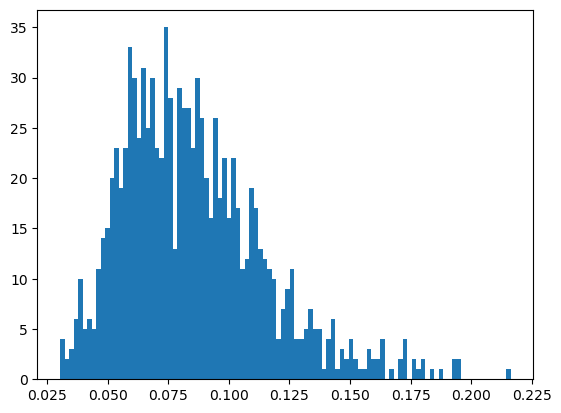

In [115]:
plt.hist(scores5, bins=100)

### Activity 5 Data Record

In [42]:
import pandas as pd

In [110]:
# Access the existing data frame
df_existing5 = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new5 = pd.DataFrame({'storage_tomato_MC': scores5})
# Append new data as a new column to the existing DataFrame
df_updated5 = pd.concat([df_existing5, df_new5], axis=1)

In [111]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated5.to_excel(writer, index=False, sheet_name='Sheet1')

## Activity 6: Waste Treatment

In [ ]:
# Select the ecoinvent database
eidb = bw.Database('ecoinvent 3.6_cut-off_ecoSpold02')  

In [32]:
for act in [act for act in eidb if 'treatment of kitchen and garden biowaste' in act['name'] and 'RoW' in act['location']]:
    print(act)
    print(act['code'])

'treatment of kitchen and garden biowaste, home composting in heaps and containers' (kilogram, RoW, None)
02cf6e9c4e449706ca510afd8ed300e1
'treatment of kitchen and garden biowaste, home composting in heaps and containers' (kilogram, RoW, None)
3103f3b7eac480f3157aa9a87dc9019d


In [34]:
# Check select activity details
a = eidb.get('3103f3b7eac480f3157aa9a87dc9019d')
a.as_dict()

{'comment': 'Comment on the dry mass (DM) loss: The dry mass (DM) loss for this inventory is lower than for the inventory for home composting of garden waste. This is for the following reasons:\n1/ This inventory has actually a mix of kitchen and green waste (used as structurant) in a 1:2 proportion as input. Indeed, mixed waste (kitchen waste + structurant) is less biodegradable than garden waste, because of:\n- A difference in composition: green waste (used as structurant) comes from the maintenance of public gardens. Garden waste was a sample taken from the same source (maintenance of public gardens) but only composed of grass cutting and pruning residues, removing more woody types of residues like branches. The objective was to have a garden waste more representative of the waste from domestic gardens. Because of this difference in composition, while kitchen waste alone was more degradable than garden waste, green waste (used as structurant) was less biodegradable than garden waste

In [ ]:
# Check all exchanges of each activity
a = eidb.get('a699b572e6fc8b34f9f4f19e388ada69')
for exchange in a.exchanges():
    print(exchange)

In [79]:
# waste management
# create a new activity
waste_management = eidb.new_activity(code = 'waste_management', name = "waste_management", unit = "unit")
waste_management.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
auxiliary_equipment_recycled = [act for act in eidb if 'treatment of waste polyethylene' in act['name'] and 'market' not in act['name'] and 'recycling' in act['name'] and 'terephthalate' not in act['name'] and 'Europe' in act['location']][0] 
# treatment of waste polyethylene, for recycling, unsorted, sorting' (kilogram, Europe without Switzerland, None)
waste_management.new_exchange(input=auxiliary_equipment_recycled.key, amount=0.1, type='technosphere').save()
waste_management.save()

auxiliary_equipment_incinerated = [act for act in eidb if 'treatment of municipal solid waste' in act['name'] and 'GB' in act['location'] and 'kilogram' in act['unit']][0] 
# treatment of municipal solid waste, incineration' (kilogram, GB, None)
waste_management.new_exchange(input=auxiliary_equipment_incinerated.key, amount=2.1, type='technosphere').save()
waste_management.save()

plant_composting = eidb.get('3103f3b7eac480f3157aa9a87dc9019d')
# treatment of kitchen and garden biowaste, home composting in heaps and containers' (kilogram, RoW, None) -- 2 identical activities, select by unique code, reference product is compost
waste_management.new_exchange(input=plant_composting.key, amount=0.46, type='technosphere').save()
waste_management.save()

transport = [act for act in eidb if 'lorry 3.5-7.5 metric ton, EURO6' in act['name'] and 'market' not in act['name'] and 'RoW' in act['location']][0]  
# 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None)
waste_management.new_exchange(input=transport.key, amount=0.00911, type='technosphere').save()
waste_management.save()


In [78]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='waste_management']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [ ]:
# get general information on the new activity
eidb.search('waste_management')

In [80]:
# Have a look at all exchanges of the selected activity
for exc in waste_management.exchanges():
    print(exc)

Exchange: 0.1 kilogram 'treatment of waste polyethylene, for recycling, unsorted, sorting' (kilogram, Europe without Switzerland, None) to 'waste_management' (unit, GLO, None)>
Exchange: 2.1 kilogram 'treatment of municipal solid waste, incineration' (kilogram, GB, None) to 'waste_management' (unit, GLO, None)>
Exchange: 0.46 kilogram 'treatment of kitchen and garden biowaste, home composting in heaps and containers' (kilogram, RoW, None) to 'waste_management' (unit, GLO, None)>
Exchange: 0.00911 ton kilometer 'transport, freight, lorry 3.5-7.5 metric ton, EURO6' (ton kilometer, RoW, None) to 'waste_management' (unit, GLO, None)>


### Activity 6 LCA and Monte Carlo

In [81]:
functional_unit6 = {waste_management:1}

In [82]:
IPCC_method6 = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [83]:
lca6 = bw.LCA(functional_unit6,IPCC_method6)

In [84]:
lca6.lci()
lca6.lcia()

In [85]:
mean_score6 = lca6.score

In [86]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit6.keys())[0]['name'],
    lca6.score,
    bw.methods.get(IPCC_method6).get('unit')
    ))

The waste_management process accounts for -1.048244 kg CO2-Eq.


In [87]:
np.random.seed(123456)
mc6 = bw.MonteCarloLCA({waste_management:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores6 = [next(mc6) for iteration in range(1000)]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  3.,  2.,  1.,  2.,  0.,  2.,  4.,
         2.,  5.,  8.,  4.,  2.,  5.,  6.,  8.,  4.,  6., 12.,  8.,  8.,
         5., 14., 20., 17., 14., 24., 15., 24., 19., 23., 25., 31., 22.,
        27., 25., 26., 28., 28., 37., 23., 38., 25., 30., 33., 27., 30.,
        31., 36., 29., 28., 27., 18., 16., 22.,  3., 11., 16.,  4.,  9.,
         4.,  5.,  1.,  2.,  3.,  1.,  1.,  1.,  1.]),
 array([-2.17057632, -2.15500263, -2.13942894, -2.12385526, -2.10828157,
        -2.09270788, -2.0771342 , -2.06156051, -2.04598682, -2.03041314,
        -2.01483945, -1.99926576, -1.98369208, -1.96811839, -1.9525447 ,
        -1.93697102, -1.92139733, -1.90582364, -1.89024996, -1.87467627,
        -1.85910258, -1.8435289 , -1.82795521, -1.81238152, -1.79680784,
        -1.78123415, -1.76566046, -1.75008678, -1.73451309, -1.718939

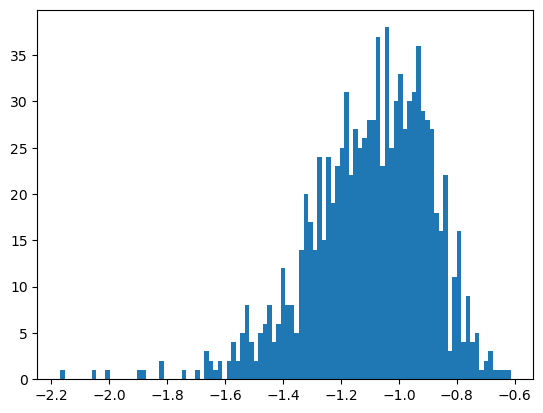

In [128]:
plt.hist(scores6, bins=100)

### Activity 6 Data Record

In [42]:
import pandas as pd

In [112]:
# Access the existing data frame
df_existing6 = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new6 = pd.DataFrame({'waste_management_MC': scores6})
# Append new data as a new column to the existing DataFrame
df_updated6 = pd.concat([df_existing6, df_new6], axis=1)

In [113]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated6.to_excel(writer, index=False, sheet_name='Sheet1')

# 4 LCA

## 4.1 Combine all activities

In [202]:
for act in [act for act in eidb if 'storage_tomato' in act['name']]:
    print(act)
    print(act['code'])

'storage_tomato' (unit, GLO, None)
storage_tomato


In [5]:
# Define All Activities Combined
# create a new activity
tomato_production = eidb.new_activity(code = 'tomato_production', name = "tomato_production", unit = "unit")
tomato_production.save()

# Search for items in ecoinvent, use the first result (you might want to ensure that you've got the right one)
# Create exchanges for each item
# Save changes
raised_bed = [act for act in eidb if 'raised_bed' in act['name']][0]
tomato_production.new_exchange(input=raised_bed.key, amount=1, type='technosphere').save()
tomato_production.save()

auxiliary_equipment = [act for act in eidb if 'auxiliary_equipment' in act['name']][0]
tomato_production.new_exchange(input=auxiliary_equipment.key, amount=1, type='technosphere').save()
tomato_production.save()

growing_medium = [act for act in eidb if 'growing_medium' in act['name']][0]
tomato_production.new_exchange(input=growing_medium.key, amount=1, type='technosphere').save()
tomato_production.save()

crop_growth = [act for act in eidb if 'crop_growth' in act['name']][0]
tomato_production.new_exchange(input=crop_growth.key, amount=1, type='technosphere').save()
tomato_production.save()

storage_tomato = [act for act in eidb if 'storage_tomato' in act['name']][0]
tomato_production.new_exchange(input=storage_tomato.key, amount=1, type='technosphere').save()
tomato_production.save()

waste_management = [act for act in eidb if 'waste_management' in act['name']][0]
tomato_production.new_exchange(input=waste_management.key, amount=1, type='technosphere').save()
tomato_production.save()
    

In [4]:
# delete all waste handling activities that were accidentally created
for activity in [act for act in eidb if act['name']=='tomato_production']:
    activity.delete()
# delete individual raised_bed activity
# raised_bed.delete

In [6]:
# Have a look at all exchanges of the selected activity
for exc in tomato_production.exchanges():
    print(exc)

Exchange: 1 unit 'raised_bed' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>
Exchange: 1 unit 'auxiliary_equipment' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>
Exchange: 1 unit 'growing_medium' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>
Exchange: 1 unit 'crop_growth' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>
Exchange: 1 unit 'storage_tomato' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>
Exchange: 1 unit 'waste_management' (unit, GLO, None) to 'tomato_production' (unit, GLO, None)>


## 4.2 Definition of LCIA methods and functional unit

### LCA Calculation

In [35]:
list(bw.methods)

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

In [3]:
bw.methods.get(('IPCC 2021 no LT',
  'climate change no LT',
  'global warming potential (GWP20) no LT'))

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg CO2-Eq',
 'abbreviation': 'ipcc-2021-no-ltcg.14f35b69b78ce274f1f597afb97e0ff5',
 'num_cfs': 182}

In [7]:
functional_unit = {tomato_production:1}
IPCC_method = [m for m in bw.methods if 'IPCC 2021' in str(m) and  'climate change' in str(m) and 'GWP100' in str(m) and not 'no LT' in str(m)][0]

In [8]:
lca = bw.LCA(functional_unit, IPCC_method)

In [9]:
lca.lci()
lca.lcia()

In [142]:
lca.demand

{'tomato_production' (unit, GLO, None): 1}

In [143]:
lca.method

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [94]:
mean_total_score = lca.score

In [96]:
print("The {} process accounts for {:f} {}.".format(
    list(functional_unit.keys())[0]['name'],
    lca.score,
    bw.methods.get(IPCC_method).get('unit')
    ))

The tomato_production process accounts for 0.339812 kg CO2-Eq.


## 4.3 Basic contribution analysis

In [256]:
import bw2analyzer as bwa

In [257]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=5) #returns a list of tuples: (lca score, supply amount, activity name)

[(-1.0303334273035216,
  -2.09998501284161,
  'treatment of municipal solid waste, incineration' (kilogram, GB, None)),
 (-0.48842252967182165,
  -14.439689982069996,
  'treatment of biowaste, industrial composting' (kilogram, RoW, None)),
 (0.4012087496145647,
  3.486055733701693,
  'heat production, at hard coal industrial furnace 1-10MW' (megajoule, RoW, None)),
 (0.232689175294045,
  0.16164478389214593,
  'ethylene production, average' (kilogram, RoW, None)),
 (0.1660288900397401,
  0.1257794571532917,
  'carbon black production' (kilogram, GLO, None))]

In [258]:
ca.hinton_matrix(lca, rows=10, cols=10)

{'results': [(0, 7, 0.054156661106774924),
  (0, 8, 0.0017489273449960267),
  (1, 0, -1.780877521050475e-05),
  (1, 1, -0.38987164803379865),
  (1, 3, 0.00012655041148918942),
  (1, 6, 3.1189886765996315e-05),
  (1, 9, 2.4550817064725052e-05),
  (2, 0, -0.027413290714927343),
  (2, 1, -0.09855088163802299),
  (2, 2, 0.0011896164890734617),
  (2, 3, 1.2586922536105087e-11),
  (2, 6, 3.1022000166868008e-12),
  (2, 9, 2.5283392595045876e-12),
  (3, 7, 2.881907894535156e-05),
  (3, 8, 0.05130281266070664),
  (4, 0, -1.2490878234928051e-05),
  (4, 2, 0.0012985556947539855),
  (4, 3, 0.050906210378909904),
  (4, 6, 0.012546454165736324),
  (4, 9, 0.010246242737989481),
  (5, 5, -0.09587705624542206),
  (6, 0, -1.0028898369351489),
  (6, 2, 0.3987176338924613),
  (6, 3, 0.18165641448924053),
  (6, 4, 0.1660288900397401),
  (6, 6, 0.04477143085955363),
  (6, 9, 0.03477857858159477),
  (7, 7, 0.0002640137165606529),
  (7, 8, 2.4774313205113744e-05),
  (8, 5, -1.956268113217134e-05)],
 'total': 

## 4.4 Monte Carlo

In [10]:
#MC simulation with 10 iterations for our banana production and the IPCC GWP100a method
np.random.seed(999)
mc = bw.MonteCarloLCA({tomato_production:1},  ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'))
scores = [next(mc) for iteration in range(1000)]

In [118]:
# Calculate the 2.5% and 97.5% percentiles
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)
print(lower_bound)
print(upper_bound)

-0.1278433048349708
1.2408035130897388


### ActivityTotal Data Record

In [42]:
import pandas as pd

In [11]:
# Access the existing data frame
df_existing_total = pd.read_excel('output2.xlsx')
# Put the Monte Carlo result in a dataframe
df_new_total = pd.DataFrame({'total_MC': scores})
# Append new data as a new column to the existing DataFrame
df_updated_total = pd.concat([df_existing_total, df_new_total], axis=1)

In [12]:
# Save in Excel
with pd.ExcelWriter('output2.xlsx') as writer:
    df_updated_total.to_excel(writer, index=False, sheet_name='Sheet1')

In [5]:
import matplotlib.pyplot as plt

Text(1.3408035130897389, 35, '97.5% Range\n(1.24)')

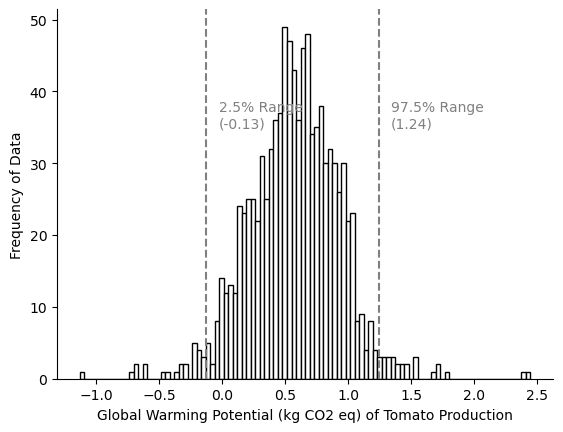

In [119]:
plt.hist(scores, bins=100, edgecolor='black', color = 'white')
plt.xlabel('Global Warming Potential (kg CO2 eq) of Tomato Production')
plt.ylabel('Frequency of Data')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add dashed lines for the 2.5% and 97.5% percentiles
plt.axvline(lower_bound, color='grey', linestyle='--', label='2.5%')
plt.axvline(upper_bound, color='grey', linestyle='--', label='97.5%')

# Add text annotations for the number range above the dashed lines
plt.text(lower_bound + 0.1, 35, f'2.5% Range\n({lower_bound:.2f})', color='grey')
plt.text(upper_bound + 0.1, 35, f'97.5% Range\n({upper_bound:.2f})', color='grey')

In [125]:
import matplotlib.pyplot as plt

In [128]:

plt.style.use('science')

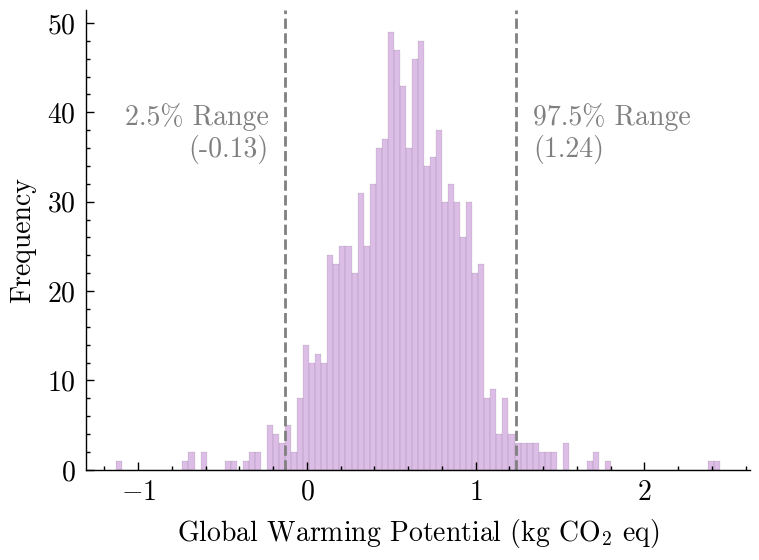

In [226]:
with plt.style.context(['science', 'no-latex', 'retro']):
    fig, ax = plt.subplots(figsize=(4,3), dpi=200)
    
    # Get the current colour cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    ax.hist(scores, bins=100, edgecolor='black', color=color_cycle[5], linewidth=0.05, alpha = 0.5)


    # Add dashed lines for the 2.5% and 97.5% percentiles
    ax.axvline(lower_bound, color='grey', linestyle='--', label='2.5%')
    ax.axvline(upper_bound, color='grey', linestyle='--', label='97.5%')
    
    # Hide top and right axis and ticks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    ax.tick_params(top=False, right=False)
    ax.tick_params(top=False, right=False, which='minor')

    # Add text annotations for the number range above the dashed lines
    ax.text(lower_bound - 0.1, 35, f'2.5% Range\n({lower_bound:.2f})', color='grey', ha='right')
    ax.text(upper_bound + 0.1, 35, f'97.5% Range\n({upper_bound:.2f})', color='grey')

    ax.set_xlabel('Global Warming Potential (kg CO$_2$ eq)')
    ax.set_ylabel('Frequency')
    
    fig.tight_layout()

    ax.autoscale(enable=True, axis='y')

fig.savefig("output_histogram.png", bbox_inches='tight')

## Plot for main contribution processes

In [237]:
# Calculate the 2.5% and 97.5% percentiles for 6 activites
lower_bound1 = np.percentile(scores1, 2.5)
upper_bound1 = np.percentile(scores1, 97.5)
lower_bound2 = np.percentile(scores2, 2.5)
upper_bound2 = np.percentile(scores2, 97.5)
lower_bound3 = np.percentile(scores3, 2.5)
upper_bound3 = np.percentile(scores3, 97.5)
lower_bound4 = np.percentile(scores4, 2.5)
upper_bound4 = np.percentile(scores4, 97.5)
lower_bound5 = np.percentile(scores5, 2.5)
upper_bound5 = np.percentile(scores5, 97.5)
lower_bound6 = np.percentile(scores6, 2.5)
upper_bound6 = np.percentile(scores6, 97.5)

range_process_contribution = list([lower_bound1, upper_bound1,lower_bound2, upper_bound2,lower_bound3, upper_bound3,lower_bound4, upper_bound4,lower_bound5, upper_bound5, lower_bound6, upper_bound6])

# Calculate the percentage contribution


In [238]:
import pandas as pd

process_scores = {'Activity': ['Raised Bed Construction', 'Auxiliary Equipment', 'Growing Medium', 
                               'Crop Growth', 'Storage', 'Waste Management'], 
                  'Mean Score': [mean_score1, mean_score2, mean_score3, mean_score4, mean_score5, mean_score6]}

process_scores_df = pd.DataFrame(process_scores)

In [239]:
# Calculate the absolute values of the mean scores
abs_mean_scores = np.abs(process_scores_df['Mean Score'])

# Calculate the percentage contribution and add it as a new column in the DataFrame
process_scores_df['Percentage Contribution'] = process_scores_df['Mean Score'] / abs_mean_scores.sum() * 100

In [240]:
# Enter the upper and lower value to the df
process_scores_df['Upper Score'] = [upper_bound1, upper_bound2, upper_bound3, upper_bound4, upper_bound5, upper_bound6]
process_scores_df['Lower Score'] = [lower_bound1, lower_bound2, lower_bound3, lower_bound4, lower_bound5, lower_bound6]

In [252]:
print(process_scores_df)

                  Activity  Mean Score  Percentage Contribution  Upper Score  \
0  Raised Bed Construction    1.500482                38.299105     2.263387   
1      Auxiliary Equipment    0.474859                12.120560     0.701398   
2           Growing Medium   -0.740750               -18.907293    -0.601599   
3              Crop Growth    0.076065                 1.941534     0.104458   
4                  Storage    0.077399                 1.975567     0.160077   
5         Waste Management   -1.048244               -26.755942    -0.756605   

   Lower Score  Upper Percentage Contribution  Lower Percentage Contribution  \
0     1.381379                      49.337885                      29.999733   
1     0.413045                      15.289261                       8.970198   
2    -1.105714                      13.113805                      24.013054   
3     0.071560                       2.276992                       1.554087   
4     0.039321                       3.

In [241]:
# Calculate the absolute values of the upper scores
abs_upper_scores = np.abs(process_scores_df['Upper Score'])

# Calculate the upper percentage contribution and add it as a new column in the DataFrame
process_scores_df['Upper Percentage Contribution'] = abs_upper_scores / abs_upper_scores.sum() * 100

# Calculate the absolute values of the lower scores
abs_lower_scores = np.abs(process_scores_df['Lower Score'])

# Calculate the upper percentage contribution and add it as a new column in the DataFrame
process_scores_df['Lower Percentage Contribution'] = abs_lower_scores / abs_lower_scores.sum() * 100

In [242]:
# Calculte the lower and upper errors
process_scores_df.columns

Index(['Activity', 'Mean Score', 'Percentage Contribution', 'Upper Score',
       'Lower Score', 'Upper Percentage Contribution',
       'Lower Percentage Contribution'],
      dtype='object')

In [251]:
# Calculate the errors
process_scores_df['Upper Error'] = abs(abs(process_scores_df['Percentage Contribution']) - abs(process_scores_df['Upper Percentage Contribution']))
process_scores_df['Lower Error'] = abs(abs(process_scores_df['Percentage Contribution']) - abs(process_scores_df['Lower Percentage Contribution']))

In [254]:
# Save process_scores_df to excel
import openpyxl
import xlsxwriter
# Write the dataframe object into Excel file
process_scores_df.to_excel("process_scores_summary.xlsx", index=False)

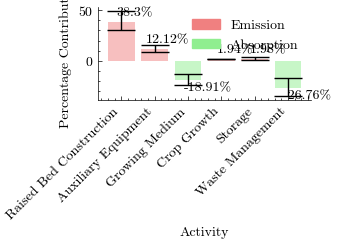

In [268]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()


# Set colors for bars based on positive or negative values
colors = ['lightcoral' if x >= 0 else 'lightgreen' for x in process_scores_df['Percentage Contribution']]

# Generate the bar plot with error bars
bars = ax.bar(process_scores_df['Activity'], process_scores_df['Percentage Contribution'], 
       yerr=[process_scores_df['Lower Error'], process_scores_df['Upper Error']], 
       align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)

# Set the labels and title
ax.set_ylabel('Percentage Contribution', fontsize = 10)
ax.set_xlabel('Activity')

# Rotate x labels for better visibility if they are long
plt.xticks(rotation=45, ha='right', fontsize = 10)

# only show x and y axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.tick_params(top=False, right=False)
ax.tick_params(top=False, right=False, which='minor')


# Adding text labels
for bar in bars:
    yval = bar.get_height()
    if yval >= 0:
        ax.text(bar.get_x() + bar.get_width()/2 + 0.4, yval + 3, f'{round(yval, 2)}%', ha='center', va='bottom')
    else:
        ax.text(bar.get_x() + bar.get_width()/2 + 0.6, yval - 1.5, f'{round(yval, 2)}%', ha='center', va='top')

# Add custom legend handles with desired colors
legend_labels = ['Emission', 'Absorption']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='lightcoral'), plt.Rectangle((0, 0), 1, 1, color='lightgreen')]

# Add legend with custom handles and labels
ax.legend(legend_handles, legend_labels)

# Show the plot
plt.tight_layout()  # adjusts subplot params so that the subplot fits into the figure area
plt.show()


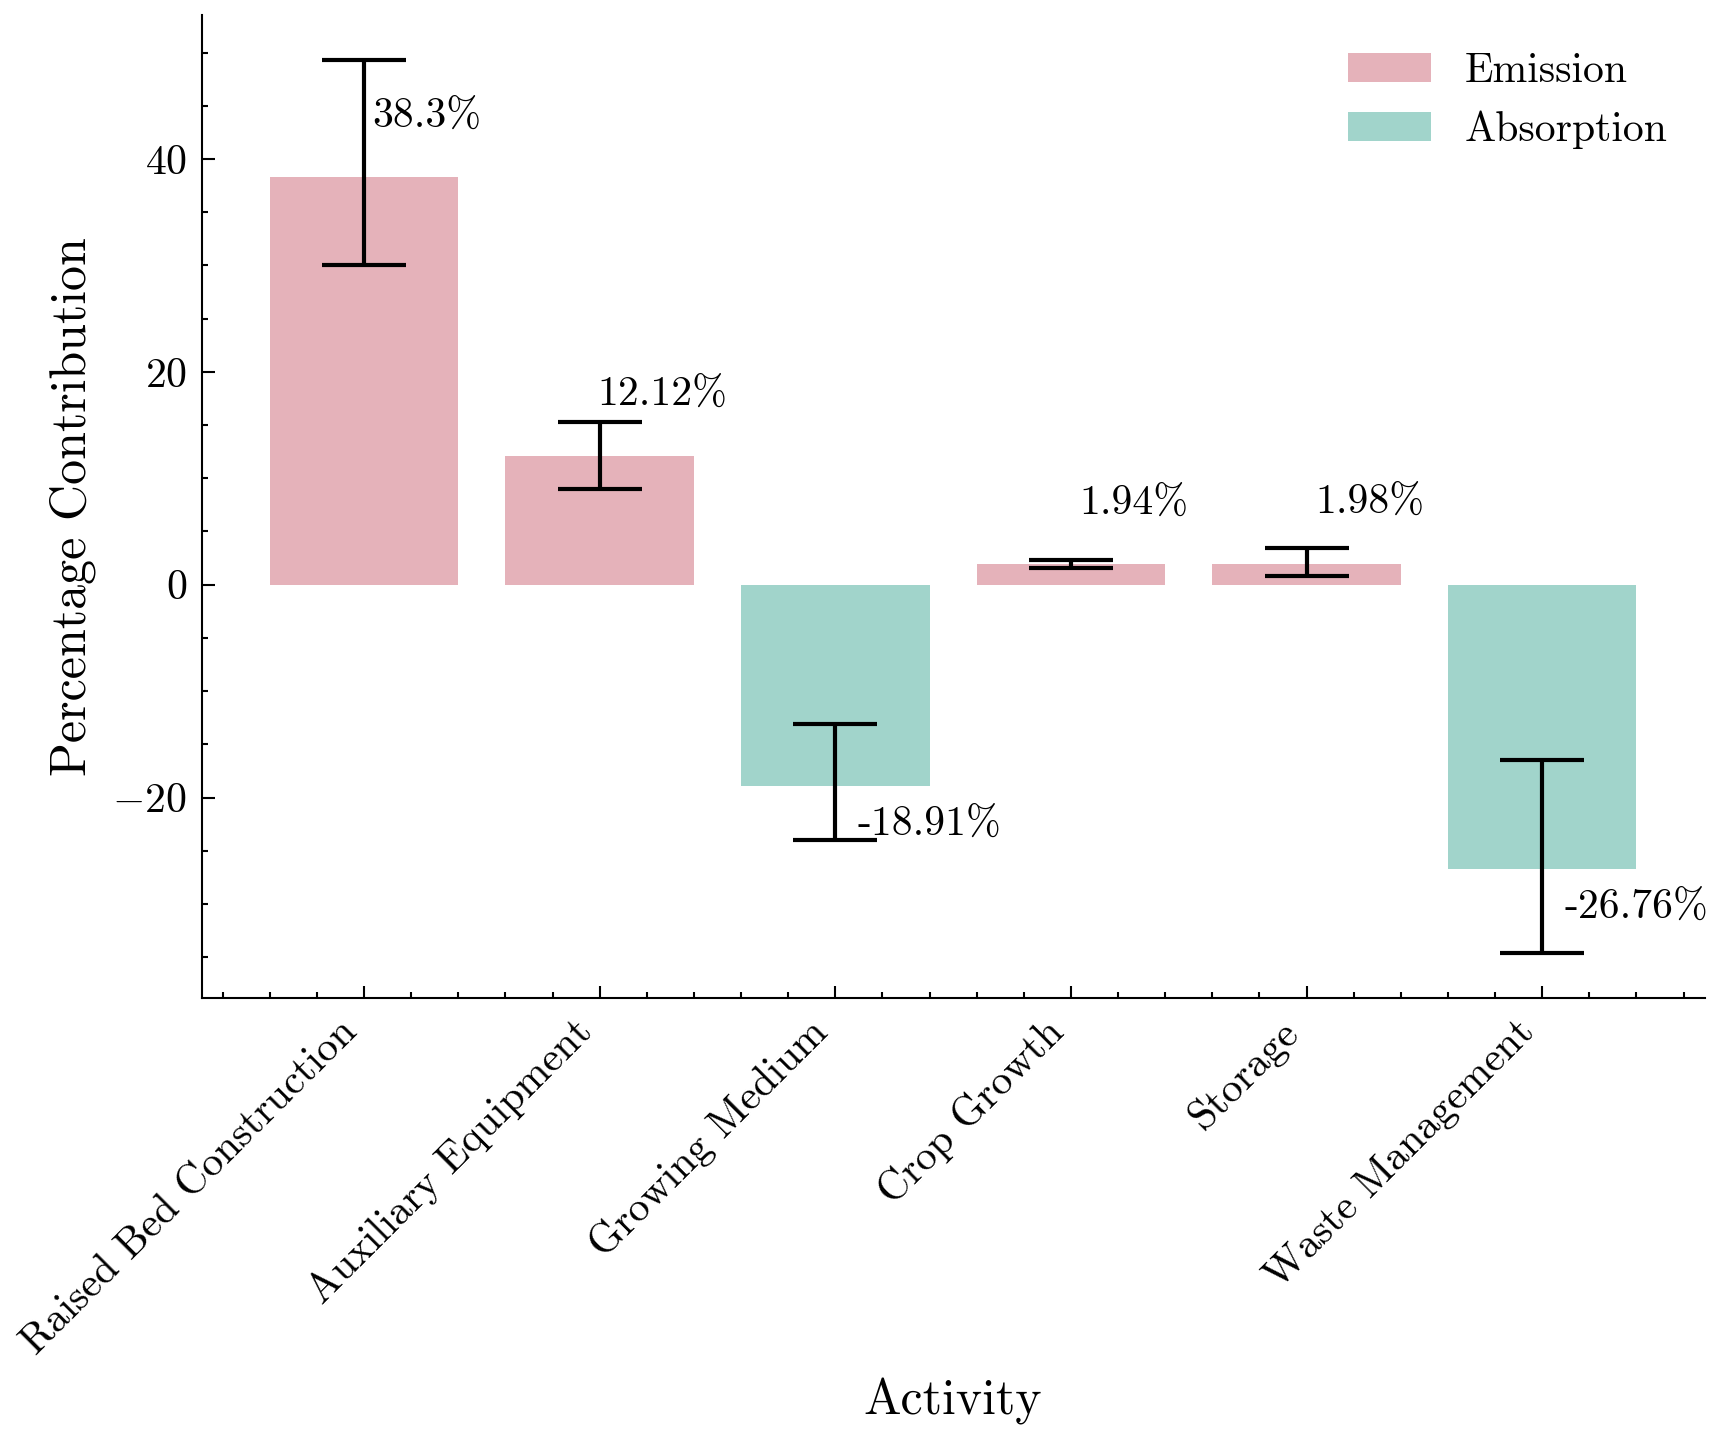

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Read Excel file into DataFrame
process_scores_df = pd.read_excel("process_scores_summary.xlsx")

plt.style.use(['science', 'no-latex', 'muted'])

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# Get the current colour cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Set colors for bars based on positive or negative values
colors = [color_cycle[0] if x >= 0 else color_cycle[6] for x in process_scores_df['Percentage Contribution']]

# Generate the bar plot with error bars
bars = ax.bar(process_scores_df['Activity'], process_scores_df['Percentage Contribution'], 
       yerr=[process_scores_df['Lower Error'], process_scores_df['Upper Error']], 
       align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)

# Set the labels and title
ax.set_ylabel('Percentage Contribution', fontsize = 12)
ax.set_xlabel('Activity', fontsize = 12)


# Rotate x labels for better visibility if they are long
plt.xticks(rotation=45, ha='right', fontsize = 10)

# only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(top=False, right=False)
ax.tick_params(top=False, right=False, which='minor')

# Adding text labels
for bar in bars:
    yval = bar.get_height()
    if yval >= 0:
        ax.text(bar.get_x() + bar.get_width()/1.2, yval + 4, f'{round(yval, 2)}%', ha='center', va='bottom')
    else:
        ax.text(bar.get_x() + bar.get_width()/1, yval - 1.8, f'{round(yval, 2)}%', ha='center', va='top')

# Add custom legend handles with desired colors
legend_labels = ['Emission', 'Absorption']
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_cycle[0], alpha=0.5, edgecolor='none'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_cycle[6], alpha=0.5, edgecolor='none')
]



# Add legend with custom handles and labels
ax.legend(legend_handles, legend_labels)

# Show the plot
plt.tight_layout()  # adjusts subplot params so that the subplot fits into the figure area
plt.show()

fig.savefig("output_barplot.svg", bbox_inches='tight')

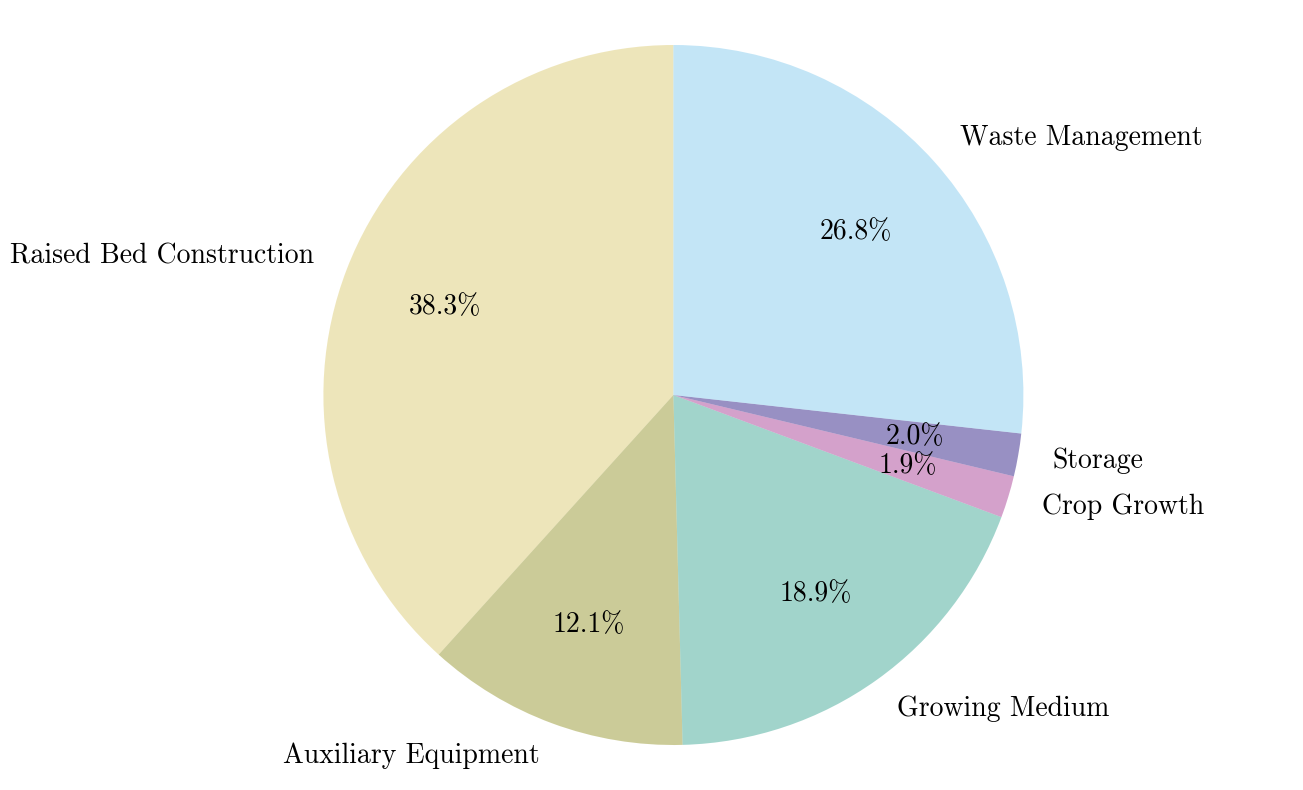

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['science', 'no-latex', 'muted'])

# Create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=200)

# Get the absolute values of percentage contributions to accurately represent the sizes in the pie chart
absolute_percentage_contributions = abs(process_scores_df['Percentage Contribution'])

# Get the current colour cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Add alpha to the colors
colors = [color_cycle[2], color_cycle[7], color_cycle[6], color_cycle[8], color_cycle[1], color_cycle[4]]

# Generate the pie chart
wedges, texts, autotexts = ax.pie(absolute_percentage_contributions, labels=process_scores_df['Activity'],
                                  autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10},
                                  colors=colors, pctdistance=0.7, wedgeprops={'alpha': 0.5})

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.show()
fig.savefig("output_Pie.png", bbox_inches='tight')
